**Degustações de café** *[Análise de pesquisa]*

O YouTuber britânico (e ex-campeão mundial barista) James Hoffman apresentou virtualmente o Great American Coffee Taste Test, durante o qual milhares de pessoas degustaram às cegas os mesmos quatro cafés simultaneamente. Hoffman publicou um vídeo resumindo os resultados, bem como uma planilha com respostas anônimas de mais de 4.000 participantes. A planilha inclui dados demográficos dos degustadores, hábitos e preferências gerais de consumo de café, avaliações dos quatro cafés e muito mais.
CR: https://bit.ly/gacttCSV+

#Camada bronze

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/coffee_survey.csv")

FileNotFoundError: [Errno 2] No such file or directory: '/coffee_survey.csv'

In [ ]:
df.head(50)

NameError: name 'df' is not defined

In [ ]:
df.shape

NameError: name 'df' is not defined

In [ ]:
#Criação da camada Bronze
df.to_csv("df_bronze.csv", index=False)
print("Camada bronze concluída!")

Camada bronze concluída!


#Camada Silver

In [ ]:
df_silver = pd.read_csv("/content/df_bronze.csv")

In [ ]:
#Padronizando caracteres
df_silver.columns = (
    df_silver.columns.str.lower()
              .str.normalize('NFKD')
              .str.encode('ascii', errors='ignore')
              .str.decode('utf-8')
              .str.replace('[^a-zA-Z0-9]+', '_', regex=True)
              .str.strip('_')
)

In [ ]:
map_colunas = {
    "submission_id": "id_envio",
    "what_is_your_age": "idade",
    "how_many_cups_of_coffee_do_you_typically_drink_per_day": "copos_por_dia",

    "where_do_you_typically_drink_coffee": "onde_bebe_cafe",
    "where_do_you_typically_drink_coffee_at_home": "bebe_em_casa",
    "where_do_you_typically_drink_coffee_at_the_office": "bebe_no_escritorio",
    "where_do_you_typically_drink_coffee_on_the_go": "bebe_em_movimento",
    "where_do_you_typically_drink_coffee_at_a_cafe": "bebe_em_cafeteria",
    "where_do_you_typically_drink_coffee_none_of_these": "bebe_nenhum_destes",

    "how_do_you_brew_coffee_at_home": "preparo_em_casa",
    "how_do_you_brew_coffee_at_home_pour_over": "cafe_pour_over",
    "how_do_you_brew_coffee_at_home_french_press": "cafe_prensa_francesa",
    "how_do_you_brew_coffee_at_home_espresso": "cafe_espresso",
    "how_do_you_brew_coffee_at_home_coffee_brewing_machine_e_g_mr_coffee": "cafe_maquina_filtro",
    "how_do_you_brew_coffee_at_home_pod_capsule_machine_e_g_keurig_nespresso": "cafe_capsula",
    "how_do_you_brew_coffee_at_home_instant_coffee": "cafe_instantaneo",
    "how_do_you_brew_coffee_at_home_bean_to_cup_machine": "cafe_grao_para_xicara",
    "how_do_you_brew_coffee_at_home_cold_brew": "cafe_cold_brew",
    "how_do_you_brew_coffee_at_home_coffee_extract_e_g_cometeer": "cafe_extrato",
    "how_do_you_brew_coffee_at_home_other": "cafe_outro_preparo",

    "how_else_do_you_brew_coffee_at_home": "outro_preparo_em_casa",

    "on_the_go_where_do_you_typically_purchase_coffee": "onde_compra_em_movimento",
    "on_the_go_where_do_you_typically_purchase_coffee_national_chain_e_g_starbucks_dunkin": "compra_rede_nacional",
    "on_the_go_where_do_you_typically_purchase_coffee_local_cafe": "compra_cafe_local",
    "on_the_go_where_do_you_typically_purchase_coffee_drive_thru": "compra_drive_thru",
    "on_the_go_where_do_you_typically_purchase_coffee_specialty_coffee_shop": "compra_especialidade",
    "on_the_go_where_do_you_typically_purchase_coffee_deli_or_supermarket": "compra_mercado",
    "on_the_go_where_do_you_typically_purchase_coffee_other": "compra_outro",

    "where_else_do_you_purchase_coffee": "onde_mais_compra_cafe",

    "what_is_your_favorite_coffee_drink": "bebida_favorita",
    "please_specify_what_your_favorite_coffee_drink_is": "bebida_favorita_especificacao",

    "do_you_usually_add_anything_to_your_coffee": "adiciona_algo",
    "do_you_usually_add_anything_to_your_coffee_no_just_black": "toma_puro",
    "do_you_usually_add_anything_to_your_coffee_milk_dairy_alternative_or_coffee_creamer": "adiciona_leite",
    "do_you_usually_add_anything_to_your_coffee_sugar_or_sweetener": "adiciona_acucar",
    "do_you_usually_add_anything_to_your_coffee_flavor_syrup": "adiciona_xarope",
    "do_you_usually_add_anything_to_your_coffee_other": "adiciona_outro",
    "what_else_do_you_add_to_your_coffee": "outro_aditivo",

    "what_kind_of_dairy_do_you_add": "tipo_leite",
    "what_kind_of_dairy_do_you_add_whole_milk": "leite_inteiro",
    "what_kind_of_dairy_do_you_add_skim_milk": "leite_desnatado",
    "what_kind_of_dairy_do_you_add_half_and_half": "half_half",
    "what_kind_of_dairy_do_you_add_coffee_creamer": "creme_cafe",
    "what_kind_of_dairy_do_you_add_flavored_coffee_creamer": "creme_saborizado",
    "what_kind_of_dairy_do_you_add_oat_milk": "leite_aveia",
    "what_kind_of_dairy_do_you_add_almond_milk": "leite_amendoa",
    "what_kind_of_dairy_do_you_add_soy_milk": "leite_soja",
    "what_kind_of_dairy_do_you_add_other": "leite_outro",

    "what_kind_of_sugar_or_sweetener_do_you_add": "tipo_acucar",
    "what_kind_of_sugar_or_sweetener_do_you_add_granulated_sugar": "acucar_refinado",
    "what_kind_of_sugar_or_sweetener_do_you_add_artificial_sweeteners_e_g_splenda": "adocante_artificial",
    "what_kind_of_sugar_or_sweetener_do_you_add_honey": "mel",
    "what_kind_of_sugar_or_sweetener_do_you_add_maple_syrup": "xarope_bordo",
    "what_kind_of_sugar_or_sweetener_do_you_add_stevia": "stevia",
    "what_kind_of_sugar_or_sweetener_do_you_add_agave_nectar": "nectar_agave",
    "what_kind_of_sugar_or_sweetener_do_you_add_brown_sugar": "acucar_mascavo",
    "what_kind_of_sugar_or_sweetener_do_you_add_raw_sugar_turbinado": "acucar_demerara",

    "what_kind_of_flavorings_do_you_add": "tipo_aroma",
    "what_kind_of_flavorings_do_you_add_vanilla_syrup": "aroma_baunilha",
    "what_kind_of_flavorings_do_you_add_caramel_syrup": "aroma_caramelo",
    "what_kind_of_flavorings_do_you_add_hazelnut_syrup": "aroma_avela",
    "what_kind_of_flavorings_do_you_add_cinnamon_ground_or_stick": "aroma_canela",
    "what_kind_of_flavorings_do_you_add_peppermint_syrup": "aroma_hortela",
    "what_kind_of_flavorings_do_you_add_other": "aroma_outro",
    "what_other_flavoring_do_you_use": "outro_aroma",

    "before_today_s_tasting_which_of_the_following_best_described_what_kind_of_coffee_you_like": "tipo_cafe_preferido",
    "how_strong_do_you_like_your_coffee": "intensidade_preferida",
    "what_roast_level_of_coffee_do_you_prefer": "torra_preferida",
    "how_much_caffeine_do_you_like_in_your_coffee": "cafeina_preferida",

    "lastly_how_would_you_rate_your_own_coffee_expertise": "nivel_expertise",

    "coffee_a_bitterness": "cafe_a_amargor",
    "coffee_a_acidity": "cafe_a_acidez",
    "coffee_a_personal_preference": "cafe_a_preferencia",
    "coffee_a_notes": "cafe_a_notas",

    "coffee_b_bitterness": "cafe_b_amargor",
    "coffee_b_acidity": "cafe_b_acidez",
    "coffee_b_personal_preference": "cafe_b_preferencia",
    "coffee_b_notes": "cafe_b_notas",

    "coffee_c_bitterness": "cafe_c_amargor",
    "coffee_c_acidity": "cafe_c_acidez",
    "coffee_c_personal_preference": "cafe_c_preferencia",
    "coffee_c_notes": "cafe_c_notas",

    "coffee_d_bitterness": "cafe_d_amargor",
    "coffee_d_acidity": "cafe_d_acidez",
    "coffee_d_personal_preference": "cafe_d_preferencia",
    "coffee_d_notes": "cafe_d_notas",

    "between_coffee_a_coffee_b_and_coffee_c_which_did_you_prefer": "preferencia_abc",
    "between_coffee_a_and_coffee_d_which_did_you_prefer": "preferencia_a_d",
    "lastly_what_was_your_favorite_overall_coffee": "favorito_geral",

    "do_you_work_from_home_or_in_person": "modalidade_trabalho",
    "in_total_much_money_do_you_typically_spend_on_coffee_in_a_month": "gasto_mensal_cafe",

    "why_do_you_drink_coffee": "motivo_beber_cafe",
    "why_do_you_drink_coffee_it_tastes_good": "motivo_sabor",
    "why_do_you_drink_coffee_i_need_the_caffeine": "motivo_cafeina",
    "why_do_you_drink_coffee_i_need_the_ritual": "motivo_ritual",
    "why_do_you_drink_coffee_it_makes_me_go_to_the_bathroom": "motivo_laxativo",
    "why_do_you_drink_coffee_other": "motivo_outro",
    "other_reason_for_drinking_coffee": "motivo_outro_texto",

    "do_you_like_the_taste_of_coffee": "gosta_sabor_cafe",
    "do_you_know_where_your_coffee_comes_from": "sabe_origem_cafe",

    "what_is_the_most_you_ve_ever_paid_for_a_cup_of_coffee": "maior_valor_pago",
    "what_is_the_most_you_d_ever_be_willing_to_pay_for_a_cup_of_coffee": "maior_valor_disposto",

    "do_you_feel_like_youre_getting_good_value_for_your_money_when_you_buy_coffee_at_a_cafe": "satisfacao_cafe",
    "approximately_how_much_have_you_spent_on_coffee_equipment_in_the_past_5_years": "gasto_equipamentos_5_anos",
    "do_you_feel_like_youre_getting_good_value_for_your_money_with_regards_to_your_coffee_equipment": "satisfacao_equipamentos",

    "gender": "genero",
    "gender_specify": "genero_especificado", # Changed from gender_please_specify

    "education_level": "escolaridade",
    "ethnicity_race": "raca_etnia",
    "ethnicity_race_specify": "raca_etnia_especificada", # Changed from ethnicity_race_please_specify

    "employment_status": "situacao_emprego",
    "number_children": "numero_filhos", # Changed from number_of_children
    "political_affiliation": "afinidade_politica"
}
df_silver.rename(columns=map_colunas, inplace=True)

In [ ]:
#Removendo colunas vazias e duplicadas
df_silver = df_silver.dropna(axis=1, how='all')
df_silver = df_silver.drop_duplicates()

In [ ]:
#Removendo colunas que não serão utilizadas na análise
colunas_excluir = [
    'escolaridade',
    'id_envio',
    'raca_etnia',
    'raca_etnia_especificada',
    'situacao_emprego',
    'numero_filhos',
    'afinidade_politica'
]

# Exclui as colunas
df_silver = df_silver.drop(columns=colunas_excluir)

#Vislualiza colunas restantes
df_silver.columns


Index(['age', 'cups', 'where_drink', 'brew', 'brew_other', 'purchase',
       'purchase_other', 'favorite', 'favorite_specify', 'additions',
       'additions_other', 'dairy', 'sweetener', 'style', 'strength',
       'roast_level', 'caffeine', 'expertise', 'cafe_a_amargor',
       'cafe_a_acidez', 'cafe_a_preferencia', 'cafe_a_notas', 'cafe_b_amargor',
       'cafe_b_acidez', 'cafe_b_preferencia', 'cafe_b_notas', 'cafe_c_amargor',
       'cafe_c_acidez', 'cafe_c_preferencia', 'cafe_c_notas', 'cafe_d_amargor',
       'cafe_d_acidez', 'cafe_d_preferencia', 'cafe_d_notas', 'prefer_abc',
       'prefer_ad', 'prefer_overall', 'wfh', 'total_spend', 'why_drink',
       'why_drink_other', 'taste', 'know_source', 'most_paid', 'most_willing',
       'value_cafe', 'spent_equipment', 'value_equipment', 'genero',
       'genero_especificado'],
      dtype='object')

In [ ]:
#tratando os NaN
cat_cols = df_silver.select_dtypes(include='object').columns
df_silver[cat_cols] = df_silver[cat_cols].fillna("nao_informado")
df_silver.head(25)

,age,cups,where_drink,brew,brew_other,purchase,purchase_other,favorite,favorite_specify,additions,...,why_drink_other,taste,know_source,most_paid,most_willing,value_cafe,spent_equipment,value_equipment,genero,genero_especificado
0,18-24 years old,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,Regular drip coffee,nao_informado,No - just black,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
1,25-34 years old,nao_informado,nao_informado,Pod/capsule machine (e.g. Keurig/Nespresso),nao_informado,nao_informado,nao_informado,Iced coffee,nao_informado,"Sugar or sweetener, No - just black",...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
2,25-34 years old,nao_informado,nao_informado,Bean-to-cup machine,nao_informado,nao_informado,nao_informado,Regular drip coffee,nao_informado,No - just black,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
3,35-44 years old,nao_informado,nao_informado,Coffee brewing machine (e.g. Mr. Coffee),nao_informado,nao_informado,nao_informado,Iced coffee,nao_informado,"No - just black, Cinnamon",...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
4,25-34 years old,nao_informado,nao_informado,Pour over,nao_informado,nao_informado,nao_informado,Latte,nao_informado,No - just black,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
5,55-64 years old,nao_informado,nao_informado,"Pod/capsule machine (e.g. Keurig/Nespresso), E...",nao_informado,nao_informado,nao_informado,Iced coffee,nao_informado,Half & half,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
6,18-24 years old,nao_informado,"At a cafe, At the office, At home, On the go","Pour over, French press, Espresso, Instant cof...",nao_informado,"National chain (e.g. Starbucks, Dunkin), Local...",nao_informado,Pourover,nao_informado,No - just black,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
7,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
8,25-34 years old,Less than 1,At a cafe,nao_informado,nao_informado,nao_informado,nao_informado,Regular drip coffee,nao_informado,No - just black,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
9,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado


In [ ]:
mapa_bool_string_traducao = {
    'True': 'Sim',
    'False': 'Não'
}

# Identificar colunas que contêm strings 'True' ou 'False' (ou booleans que se tornariam essas strings)
boolean_like_cols = [col for col in df_silver.columns if df_silver[col].astype(str).isin(['True', 'False']).any()]

# Aplicar a tradução a essas colunas, garantindo que os valores sejam tratados como strings
for col in boolean_like_cols:
    df_silver[col] = df_silver[col].astype(str).replace(mapa_bool_string_traducao)

# Exibir a cabeça do DataFrame para verificar as mudanças em algumas colunas booleanas
# print(df_silver[['bebe_em_casa', 'cafe_pour_over', 'motivo_sabor', 'gosta_sabor_cafe']].head(20))

NameError: name 'df_silver' is not defined

In [ ]:
#Traduzindo as linhas da tabela

In [ ]:
#usando replace para genero
mapa_genero = {
    'Male': 'masculino',
    'Female': 'feminino',
    'Non-binary': 'nao_binario',
    'Prefer not to say': 'prefere_nao_responder',
    'Other (please specify)': 'Outros'
}

# Aplicar tradução na coluna genero
df_silver['genero'] = df_silver['genero'].replace(mapa_genero)


#usando replace para idade
df_silver['idade'] = df_silver['idade'].replace({
    '<18 years old':'Menor de idade',
    '18-24 years old':'18 a 24 anos',
    '25-34 years old':'25 a 34 anos',
    '35-44 years old':'35 a 44 anos',
    '45-54 years old':'45 a 54 anos',
    '55-64 years old':'55 a 64 anos',
    '>65 years old':'Mais de 65 anos'})

#usando replace para copos por dia
df_silver['copos_por_dia'] = df_silver['copos_por_dia'].replace({'Less than 1':'Menos de um', 'More than 4':'Mais de 4'})

#usando replace para onde bebe café
mapa_onde_bebe = {
    'At home': 'Em casa',
    'At the office': 'No escritório',
    'On the go': 'No caminho',
    'At a cafe': 'Em um café',
    'None of these': 'Nenhuma das opções'
}
df_silver['onde_bebe_cafe'] = df_silver['onde_bebe_cafe'].replace(mapa_onde_bebe, regex=True)

#Usando replace para bebida favorita
df_silver['bebida_favorita'] = df_silver['bebida_favorita'].replace({
    'Pourover': 'Coado',
    'Regular drip coffee':'Drip coffee',
    'Espresso':'Expresso',
    'Iced coffee':'Café gelado',
    'Other':'Outro',
    'Blended drink (e.g. Frappuccino)': 'Mistura de drinks (ex. Frappuccino)'
})

#Usando replace em adiciona algo
mapa_adiciona_algo = {
    'No - just black': 'Não - apenas café preto',
    'Milk, dairy alternative, or coffee creamer': 'Leite, leite alternativo ou creme para café (coffee creamer)',
    'Sugar or sweetener': 'Açúcar ou adoçante',
    'Flavor syrup': 'Calda',
    'Cinnamon':'Canela',
    'Half & half':'Leite meio a meio', #isso é um tipo de leite que não tem por aqui
    'Other': 'Outro'
}
df_silver['adiciona_algo'] = df_silver['adiciona_algo'].replace(mapa_adiciona_algo, regex=True)

#Usando replace para tipo de leite
mapa_tipo_leite = {
    'Whole milk':'Leite integral',
    'Skim milk':'Leite desnatado',
    'Half and half':'Leite meio a meio',
    'Cofee creamer':'Creme para café',
    'Flavored coffee creamer':'Creme para café saborizado',
    'Oat milk':'Leite de aveia',
    'Almond milk':'Leite de amendoas',
    'Soy milk':'Leite de soja',
    'Other':'Outro'
}
df_silver['tipo_leite'] = df_silver['tipo_leite'].replace(mapa_tipo_leite, regex=True)

#Usando replace para tipo de açúcar
mapa_tipo_acucar = {
    'Granulated Sugar': 'Açúcar branco',
    'Artificial Sweeteners (e.g., Splenda)': 'Adoçantes artificiais (ex. Splenda)',
    'Honey': 'Mel',
    'Maple Syrup': 'Xarope de bordo',
    'Stevia': 'Stévia',
    'Agave Nectar': 'Néctar de agave',
    'Brown Sugar': 'Açúcar mascavo',
    'Raw Sugar (turbinado)': 'Açúcar não refinado',
    'Other': 'Outro'
}
df_silver['tipo_acucar'] = df_silver['tipo_acucar'].replace(mapa_tipo_acucar, regex=True)
df_silver['tipo_acucar'][0:50]

#Usando replace para tipo de café preferido
mapa_tipo_cafe_preferido = {
    'Fruity':'Frutado',
    'Chocolatey':'Notas de chocolate',
    'Full Bodied':'Encorpado',
    'Bright':'Brilhante', #isso é realmente o nome desse tipo de sabor
    'Nutty':'Amendoado',
    'Sweet':'Doce',
    'Caramalized':'Caramelizado',
    'Juicy': 'Suculento', #em dúvida sobre essa classificação
    'Bold':'Forte',
    'Complex':'Complexo',
    'Light':'Leve'
}
df_silver['tipo_cafe_preferido'] = df_silver['tipo_cafe_preferido'].replace(mapa_tipo_cafe_preferido, regex=True)

#Usando replace para intensidade preferida
mapa_intensidade_preferida = {
    'Somewhat strong':'Um pouco forte',
    'Medium':'Média',
    'Very strong':'Muito forte',
    'Somewhat light':'Um pouco fraco',
    'Weak':'Fraco'
}
df_silver['intensidade_preferida'] = df_silver['intensidade_preferida'].replace(mapa_intensidade_preferida, regex=True)

#Usando replace para torra preferida
mapa_torra_preferida = {
    'Light':'Clara',
    'Medium':'Média',
    'Dark':'Escura',
    'Nordic':'Nórdica',
    'Blonde':'Loira',
    'French':'Francesa',
    'Italian':'Italiana'
}
df_silver['torra_preferida'] = df_silver['torra_preferida'].replace(mapa_torra_preferida, regex=True)

#Usando replace para quantidade de cafeína
mapa_cafeina_preferida = {
    'Full caffeine':'Cafeinado',
    'Half caff':'Parcialmente cafeinado',
    'Decaf':'Descafeinado'
}
df_silver['cafeina_preferida'] = df_silver['cafeina_preferida'].replace(mapa_cafeina_preferida, regex=True)

#Usando replace para modalidade de trabalho
mapa_modalidade_trabalho = {
    'I primarily work from home':'Primariamente remoto',
    'I primarily work in person':'Primariamente presencial',
    'I do a mix of both':'Híbrido'
}
df_silver['modalidade_trabalho'] = df_silver['modalidade_trabalho'].replace(mapa_modalidade_trabalho, regex=True)

#Usando replace para motivo de beber café
mapa_motivo_beber_cafe = {
    'It tastes good':'O gosto é bom',
    'I need the caffeine':'Preciso da cafeína',
    'I need the ritual':'Preciso do ritual',
    'It makes me go to the bathroom':'Me faz ir ao banheiro',
    'Other':'Outro'
}
df_silver['motivo_beber_cafe'] = df_silver['motivo_beber_cafe'].replace(mapa_motivo_beber_cafe, regex=True)



In [ ]:
#usando replace para idade
df_silver['idade'] = df_silver['idade'].replace({
    '<18 years old':'Menor de idade',
    '18-24 years old':'18 a 24 anos',
    '25-34 years old':'25 a 34 anos',
    '35-44 years old':'35 a 44 anos',
    '45-54 years old':'45 a 54 anos',
    '55-64 years old':'55 a 64 anos',
    '>65 years old':'Mais de 65 anos'})

#usando replace para copos por dia
df_silver['copos_por_dia'] = df_silver['copos_por_dia'].replace({'Less than 1':'Menos de um', 'More than 4':'Mais de 4'})

#usando replace para onde bebe café
mapa_onde_bebe = {
    'At home': 'Em casa',
    'At the office': 'No escritório',
    'On the go': 'No caminho',
    'At a cafe': 'Em um café',
    'None of these': 'Nenhuma das opções'
}
df_silver['onde_bebe_cafe'] = df_silver['onde_bebe_cafe'].replace(mapa_onde_bebe, regex=True)

#Usando replace para bebida favorita
df_silver['bebida_favorita'] = df_silver['bebida_favorita'].replace({
    'Pourover': 'Coado',
    'Regular drip coffee':'Drip coffee',
    'Espresso':'Expresso',
    'Iced coffee':'Café gelado',
    'Other':'Outro',
    'Blended drink (e.g. Frappuccino)': 'Mistura de drinks (ex. Frappuccino)'
})

#Usando replace em adiciona algo
mapa_adiciona_algo = {
    'No - just black': 'Não - apenas café preto',
    'Milk, dairy alternative, or coffee creamer': 'Leite, leite alternativo ou creme para café (coffee creamer)',
    'Sugar or sweetener': 'Açúcar ou adoçante',
    'Flavor syrup': 'Calda',
    'Cinnamon':'Canela',
    'Half & half':'Leite meio a meio', #isso é um tipo de leite que não tem por aqui
    'Other': 'Outro'
}
df_silver['adiciona_algo'] = df_silver['adiciona_algo'].replace(mapa_adiciona_algo, regex=True)

#Usando replace para tipo de leite
mapa_tipo_leite = {
    'Whole milk':'Leite integral',
    'Skim milk':'Leite desnatado',
    'Half and half':'Leite meio a meio',
    'Cofee creamer':'Creme para café',
    'Flavored coffee creamer':'Creme para café saborizado',
    'Oat milk':'Leite de aveia',
    'Almond milk':'Leite de amendoas',
    'Soy milk':'Leite de soja',
    'Other':'Outro'
}
df_silver['tipo_leite'] = df_silver['tipo_leite'].replace(mapa_tipo_leite, regex=True)

#Usando replace para tipo de açúcar
mapa_tipo_acucar = {
    'Granulated Sugar': 'Açúcar branco',
    'Artificial Sweeteners (e.g., Splenda)': 'Adoçantes artificiais (ex. Splenda)',
    'Honey': 'Mel',
    'Maple Syrup': 'Xarope de bordo',
    'Stevia': 'Stévia',
    'Agave Nectar': 'Néctar de agave',
    'Brown Sugar': 'Açúcar mascavo',
    'Raw Sugar (turbinado)': 'Açúcar não refinado',
    'Other': 'Outro'
}
df_silver['tipo_acucar'] = df_silver['tipo_acucar'].replace(mapa_tipo_acucar, regex=True)
df_silver['tipo_acucar'][0:50]

#Usando replace para tipo de café preferido
mapa_tipo_cafe_preferido = {
    'Fruity':'Frutado',
    'Chocolatey':'Notas de chocolate',
    'Full Bodied':'Encorpado',
    'Bright':'Brilhante', #isso é realmente o nome desse tipo de sabor
    'Nutty':'Amendoado',
    'Sweet':'Doce',
    'Caramalized':'Caramelizado',
    'Juicy': 'Suculento', #em dúvida sobre essa classificação
    'Bold':'Forte',
    'Complex':'Complexo',
    'Light':'Leve'
}
df_silver['tipo_cafe_preferido'] = df_silver['tipo_cafe_preferido'].replace(mapa_tipo_cafe_preferido, regex=True)

#Usando replace para intensidade preferida
mapa_intensidade_preferida = {
    'Somewhat strong':'Um pouco forte',
    'Medium':'Média',
    'Very strong':'Muito forte',
    'Somewhat light':'Um pouco fraco',
    'Weak':'Fraco'
}
df_silver['intensidade_preferida'] = df_silver['intensidade_preferida'].replace(mapa_intensidade_preferida, regex=True)

#Usando replace para torra preferida
mapa_torra_preferida = {
    'Light':'Clara',
    'Medium':'Média',
    'Dark':'Escura',
    'Nordic':'Nórdica',
    'Blonde':'Loira',
    'French':'Francesa',
    'Italian':'Italiana'
}
df_silver['torra_preferida'] = df_silver['torra_preferida'].replace(mapa_torra_preferida, regex=True)

#Usando replace para quantidade de cafeína
mapa_cafeina_preferida = {
    'Full caffeine':'Cafeinado',
    'Half caff':'Parcialmente cafeinado',
    'Decaf':'Descafeinado'
}
df_silver['cafeina_preferida'] = df_silver['cafeina_preferida'].replace(mapa_cafeina_preferida, regex=True)

#Usando replace para modalidade de trabalho
mapa_modalidade_trabalho = {
    'I primarily work from home':'Primariamente remoto',
    'I primarily work in person':'Primariamente presencial',
    'I do a mix of both':'Híbrido'
}
df_silver['modalidade_trabalho'] = df_silver['modalidade_trabalho'].replace(mapa_modalidade_trabalho, regex=True)

#Usando replace para motivo de beber café
mapa_motivo_beber_cafe = {
    'It tastes good':'O gosto é bom',
    'I need the caffeine':'Preciso da cafeína',
    'I need the ritual':'Preciso do ritual',
    'It makes me go to the bathroom':'Me faz ir ao banheiro',
    'Other':'Outro'
}
df_silver['motivo_beber_cafe'] = df_silver['motivo_beber_cafe'].replace(mapa_motivo_beber_cafe, regex=True)



In [ ]:
#Traduzir linhas com caracteres especiais

import re #Necessário usar essa biblioteca porque alguns valores possuem "/, $", isso confunde o regex

#usando replace para preparo em casa
mapa_preparo_em_casa = {
    'Pour over': 'Coado',
    'French press': 'Prensa francesa',
    'Espresso': 'Expresso',
    'Coffee brewing machine (e.g. Mr. Coffee)': 'Máquina de café (ex. Mr.Cofee)',
    'Pod/capsule machine (e.g. Keurig/Nespresso)': 'Máquina de cápsula (ex. Nespresso)',
    'Instant coffee': 'Café instantâneo',
    'Bean-to-cup machine': 'Máquina bean to cup',
    'Cold brew': 'Café gelado (cold brew)',
    'Coffee extract (e.g. Cometeer)': 'Extrato de café (exemplo Cometeer)',
    'Other':'Outro'
}
mapa_regex = {re.escape(k): v for k, v in mapa_preparo_em_casa.items()} #"escapa" as "/" e aí elas são interpretadas como texto
df_silver['preparo_em_casa'] = df_silver['preparo_em_casa'].replace(mapa_regex, regex=True)

#Mapa replace compra em movimento
mapa_compra_em_movimento = {
    'National chain (e.g. Starbucks, Dunkin)': 'Rede nacional (ex. Starbucks, Dunkin)',
    'Local cafe': 'Café local',
    'Specialty coffee shop': 'Loja de cafés especiais',
    'Deli or supermarket': 'Mercado ou deli',
    'Other': 'Outro'
}
mapa_regex_compra_em_movimento = {re.escape(k): v for k, v in mapa_compra_em_movimento.items()} #"escapa" as "/"
df_silver['onde_compra_em_movimento'] = df_silver['onde_compra_em_movimento'].replace(mapa_regex_compra_em_movimento, regex=True)

#Usando dicionário para gasto em equipamentos
mapa_gasto_equipamentos_5_anos = {
    'More than $1,000':'Mais de $1,000',
    'Less than $20':'Menos de $20'
}

mapa_regex_gasto_equipamentos_5_anos = {re.escape(k): v for k, v in mapa_gasto_equipamentos_5_anos.items()} #Usando escape por causa do $

df_silver['gasto_equipamentos_5_anos'] = df_silver['gasto_equipamentos_5_anos'].replace(mapa_regex_gasto_equipamentos_5_anos, regex=True)

In [ ]:
#Usando replace para perguntas de sim e não
mapa_sim_nao = {
    'Yes':'Sim',
    'No':'Não'
}
df_silver['gosta_sabor_cafe'] = df_silver['gosta_sabor_cafe'].replace(mapa_sim_nao, regex=True)
df_silver['sabe_origem_cafe'] = df_silver['sabe_origem_cafe'].replace(mapa_sim_nao, regex=True)
df_silver['satisfacao_cafe'] = df_silver['satisfacao_cafe'].replace(mapa_sim_nao, regex=True)
df_silver['satisfacao_equipamentos'] = df_silver['satisfacao_equipamentos'].replace(mapa_sim_nao, regex=True)

In [ ]:
#Padronizando os caracteres após a tradução
df_silver = df_silver.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-4190130170.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_silver = df_silver.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [ ]:
#tratando os NaN
df_silver = df_silver.fillna("nao_informado")
df_silver = df_silver.replace('nan', 'nao_informado')

In [ ]:
df_silver.head(50) #visualizar mudanças

,idade,copos_por_dia,onde_bebe_cafe,bebe_em_casa,bebe_no_escritorio,bebe_em_movimento,bebe_em_cafeteria,bebe_nenhum_destes,preparo_em_casa,cafe_pour_over,...,motivo_outro_texto,gosta_sabor_cafe,sabe_origem_cafe,maior_valor_pago,maior_valor_disposto,satisfacao_cafe,gasto_equipamentos_5_anos,satisfacao_equipamentos,genero,genero_especificado
0,18 a 24 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
1,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina de cápsula (ex. nespresso),não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
2,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina bean to cup,não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
3,35 a 44 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina de café (ex. mr.cofee),não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
4,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,coado,sim,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
5,55 a 64 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,"máquina de cápsula (ex. nespresso), expresso, ...",não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
6,18 a 24 anos,nao_informado,"em um café, no escritório, em casa, no caminho",sim,sim,sim,sim,não,"coado, prensa francesa, expresso, café instant...",sim,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
7,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
8,25 a 34 anos,menos de um,em um café,não,não,não,sim,não,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
9,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado


In [ ]:
#Salvar camada silver
df_silver.to_csv("df_silver.csv", index=False)
print("Camada prata concluída!")

Camada prata concluída!


#Camada gold

In [ ]:
#Sugestão de visualização sem as perguntas booleanas e respostas específicas

df_simplificado = df_silver[['idade', 'copos_por_dia', 'onde_bebe_cafe', 'preparo_em_casa','onde_compra_em_movimento',
       'onde_mais_compra_cafe', 'bebida_favorita','adiciona_algo',
       'tipo_acucar', 'tipo_cafe_preferido', 'intensidade_preferida',
       'torra_preferida', 'cafeina_preferida', 'nivel_expertise',
       'cafe_a_amargor', 'cafe_a_acidez', 'cafe_a_preferencia', 'cafe_a_notas',
       'cafe_b_amargor', 'cafe_b_acidez', 'cafe_b_preferencia', 'cafe_b_notas',
       'cafe_c_amargor', 'cafe_c_acidez', 'cafe_c_preferencia', 'cafe_c_notas',
       'cafe_d_amargor', 'cafe_d_acidez', 'cafe_d_preferencia', 'cafe_d_notas',
       'preferencia_abc', 'preferencia_a_d', 'favorito_geral',
       'modalidade_trabalho', 'gasto_mensal_cafe', 'motivo_beber_cafe','gosta_sabor_cafe',
       'sabe_origem_cafe', 'maior_valor_pago', 'maior_valor_disposto',
       'satisfacao_cafe', 'gasto_equipamentos_5_anos',
       'satisfacao_equipamentos', 'genero']]
df_simplificado.head(50)

,idade,copos_por_dia,onde_bebe_cafe,preparo_em_casa,onde_compra_em_movimento,onde_mais_compra_cafe,bebida_favorita,adiciona_algo,tipo_acucar,tipo_cafe_preferido,...,gasto_mensal_cafe,motivo_beber_cafe,gosta_sabor_cafe,sabe_origem_cafe,maior_valor_pago,maior_valor_disposto,satisfacao_cafe,gasto_equipamentos_5_anos,satisfacao_equipamentos,genero
0,18 a 24 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,drip coffee,não - apenas café preto,nao_informado,complexoo,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
1,25 a 34 anos,nao_informado,nao_informado,máquina de cápsula (ex. nespresso),nao_informado,nao_informado,café gelado,"açúcar ou adoçante, não - apenas café preto",nao_informado,leve,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
2,25 a 34 anos,nao_informado,nao_informado,máquina bean to cup,nao_informado,nao_informado,drip coffee,não - apenas café preto,nao_informado,complexoo,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
3,35 a 44 anos,nao_informado,nao_informado,máquina de café (ex. mr.cofee),nao_informado,nao_informado,café gelado,"não - apenas café preto, canela",nao_informado,complexoo,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
4,25 a 34 anos,nao_informado,nao_informado,coado,nao_informado,nao_informado,latte,não - apenas café preto,nao_informado,doce,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
5,55 a 64 anos,nao_informado,nao_informado,"máquina de cápsula (ex. nespresso), expresso, ...",nao_informado,nao_informado,café gelado,leite meio a meio,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
6,18 a 24 anos,nao_informado,"em um café, no escritório, em casa, no caminho","coado, prensa francesa, expresso, café instant...","rede nacional (ex. starbucks, dunkin), café lo...",nao_informado,coado,não - apenas café preto,nao_informado,complexoo,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
7,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
8,25 a 34 anos,menos de um,em um café,nao_informado,nao_informado,nao_informado,drip coffee,não - apenas café preto,nao_informado,leve,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
9,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado


In [ ]:
df_gold = pd.read_csv("/content/df_silver.csv")

In [ ]:
#criar banco de dados

from sqlalchemy import create_engine

#cria o banco
engine = create_engine('sqlite:///cafe_analise.db')

#salva todas as tabelas nesse banco que foi criado
df.to_sql('cafe_data_bronze',con=engine, if_exists='replace', index=False)
df_silver.to_sql('cafe_data_silver',con=engine, if_exists='replace', index=False)
df_gold.to_sql('cafe_data_gold',con=engine, if_exists='replace', index=False)

print("Banco de dados criado com sucesso!")

Banco de dados criado com sucesso!


#Análises

In [ ]:
#Proporção de bebida favorita de acordo com o gênero
np.around(
    df_gold.groupby('genero')['bebida_favorita']
        .value_counts(normalize=True) * 100,2
)


genero                 bebida_favorita
feminino               latte              31.77
                       coado              13.13
                       drip coffee        10.55
                       cappuccino         10.43
                       americano           7.03
                                          ...  
prefere_nao_responder  expresso            9.09
                       americano           6.06
                       cortado             6.06
                       outro               6.06
                       cold brew           3.03
Name: proportion, Length: 64, dtype: float64

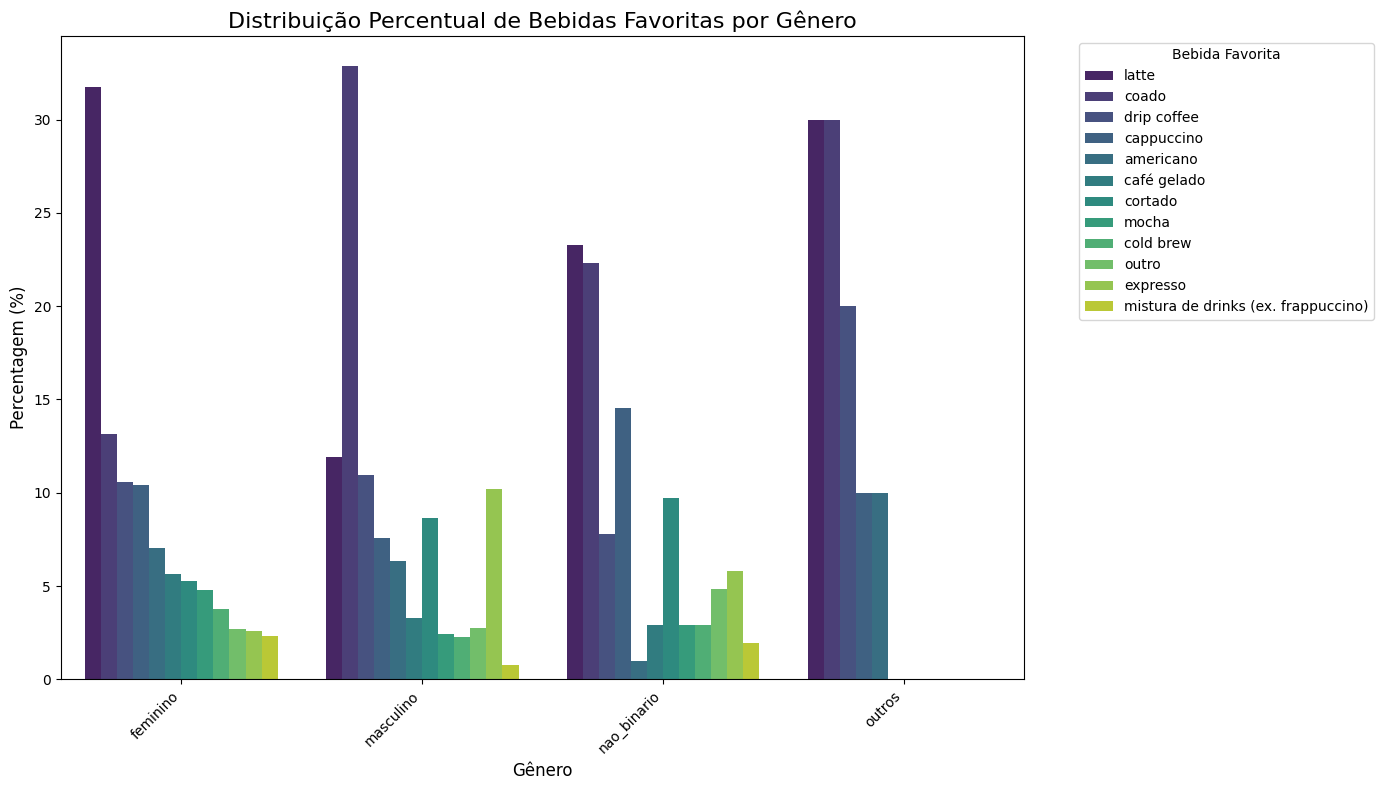

In [ ]:
# calcula a porcentagem por gênero
drink_gender_percentage = df_gold.groupby('genero')['bebida_favorita'].value_counts(normalize=True).mul(100).rename('percentagem').reset_index()

# filtra não informado e prefere_nao_responder para tirar informações não relevantes
drink_gender_percentage = drink_gender_percentage[
    (drink_gender_percentage['genero'] != 'nao_informado') &
    (drink_gender_percentage['genero'] != 'prefere_nao_responder')
]


plt.figure(figsize=(14, 8))
sns.barplot(data=drink_gender_percentage, x='genero', y='percentagem', hue='bebida_favorita', palette='viridis')
plt.title('Distribuição Percentual de Bebidas Favoritas por Gênero', fontsize=16)
plt.xlabel('Gênero', fontsize=12)
plt.ylabel('Percentagem (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bebida Favorita', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
#Qual ambiente o café é mais consumido

# Crie uma série numérica temporária da coluna 'copos_por_dia'
# Valores que não são números (incluindo 'nao_informado' e as strings 'Menos de um', 'Mais de 4')
# serão convertidos para NaN neste momento, permitindo o cálculo da média.
# A coluna original 'copos_por_dia' no DataFrame 'df' NÃO será modificada.
numeric_copos_por_dia = pd.to_numeric(df_gold['copos_por_dia'], errors='coerce')

# Agora, use esta série numérica temporária para o cálculo da média no groupby
df_gold.groupby('onde_bebe_cafe')[numeric_copos_por_dia.name].apply(lambda x: numeric_copos_por_dia[x.index].mean()).sort_values(ascending=False)

,copos_por_dia
onde_bebe_cafe,
"em casa, nenhuma das opções",3.000000
"em um café, no escritório, no caminho, em casa",2.750000
"no escritório, no caminho, em um café",2.500000
"no caminho, em casa, no escritório, em um café",2.333333
"em um café, em casa, no caminho, no escritório",2.333333
...,...
"em um café, no caminho, no escritório",1.000000
"no caminho, no escritório, em casa, em um café",1.000000
nenhuma das opções,1.000000


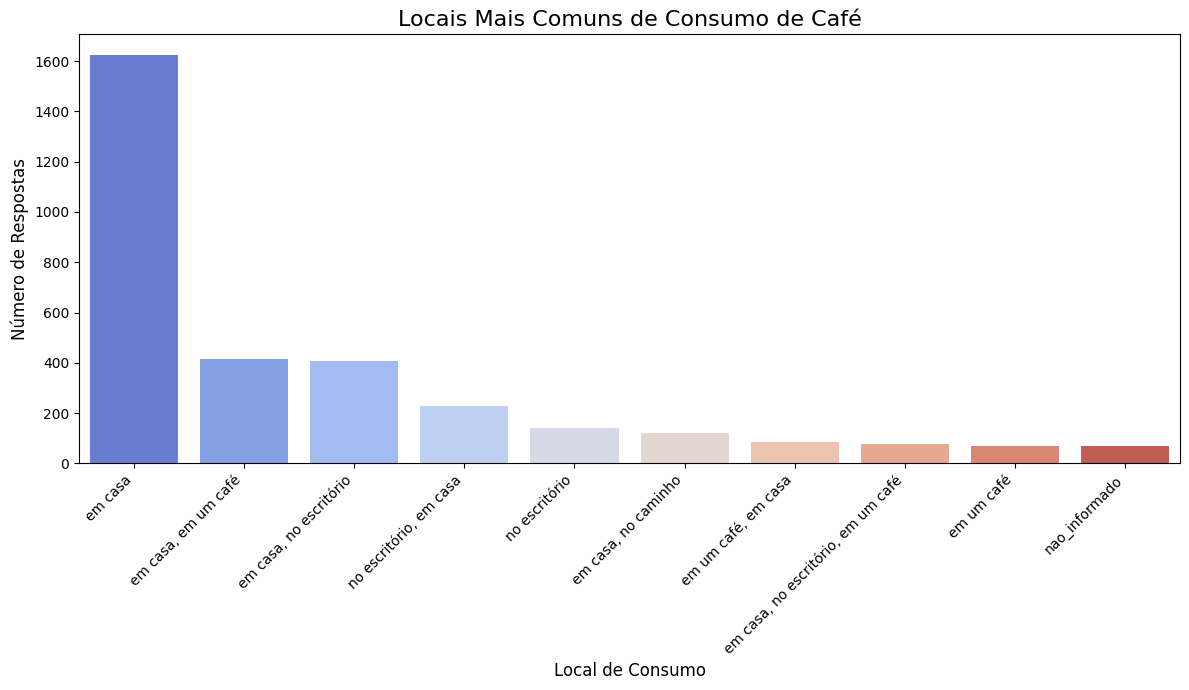

In [ ]:
#Gráfico demonstrativo em quais ambientes o café é mais consumido

# Calcular a contagem de cada local de consumo de café
contagem_onde_bebe = df_gold['onde_bebe_cafe'].value_counts()

# Filtrar os 'Não informado' se existir e pegar os 10 principais locais
contagem_onde_bebe_filtrado = contagem_onde_bebe[contagem_onde_bebe.index != 'Não informado'].head(10)

plt.figure(figsize=(12, 7))
sns.barplot(x=contagem_onde_bebe_filtrado.index, y=contagem_onde_bebe_filtrado.values, palette='coolwarm', hue=contagem_onde_bebe_filtrado.index, legend=False)
plt.title('Locais Mais Comuns de Consumo de Café', fontsize=16)
plt.xlabel('Local de Consumo', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Análise dos cafés

In [ ]:

cafe_favorito = df_gold['favorito_geral'].value_counts().idxmax()
print("Café favorito:", cafe_favorito)


Café favorito: coffee d


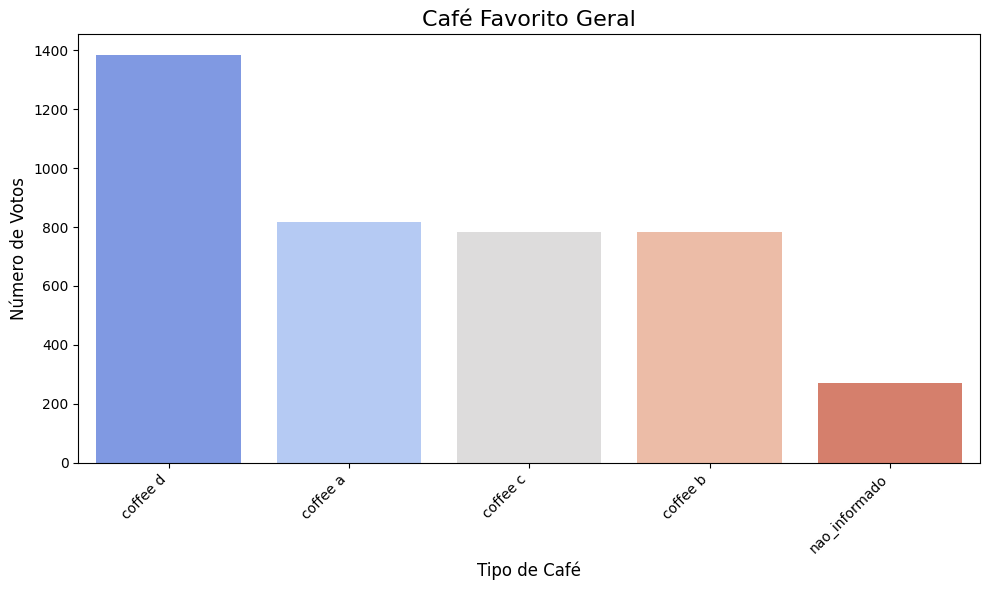

In [ ]:
# Calcular a contagem de cada café favorito
contagem_cafe_favorito = df_gold['favorito_geral'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=contagem_cafe_favorito.index, y=contagem_cafe_favorito.values, palette='coolwarm', hue=contagem_cafe_favorito.index, legend=False)
plt.title('Café Favorito Geral', fontsize=16)
plt.xlabel('Tipo de Café', fontsize=12)
plt.ylabel('Número de Votos', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Monta o nome da coluna de notas
coluna_notas = f"{cafe_favorito.lower()}_notas"


In [ ]:
cafe_letra = cafe_favorito.split(' ')[-1].lower()#colocado em minusculo porque havia variações entre B e b o que causava redundância na avaliação
coluna_notas = f"cafe_{cafe_letra}_notas"
print(f"Nova coluna_notas: {coluna_notas}")

Nova coluna_notas: cafe_d_notas


In [ ]:
notas = df_gold[coluna_notas].dropna().str.split(',')# colocando separador entre o nome e a quantidade
notas_flat = [nota.strip().lower() for sublist in notas for nota in sublist if pd.notna(nota)]

In [ ]:
from collections import Counter

notas_counts = Counter(notas_flat)
print(notas_counts.most_common(10))

[('nao_informado', 1454), ('fruity', 296), ('blueberry', 155), ('bright', 98), ('berries', 77), ('fermented', 66), ('sour', 65), ('cherry', 62), ('berry', 58), ('fruit', 58)]


##Os 10 sabores mais consumidos
-retirando os 'não_informados
-listando os 10 mais consumidos

In [ ]:
notas_series = (
    df_gold['tipo_cafe_preferido']
        .value_counts()
)

# filtrar "nao_informado"
notas_filtradas = notas_series[notas_series.index != 'nao_informado']

# top 10
top_10_notas = notas_filtradas.head(10)

print("Top 10 notas de sabor:\n", top_10_notas)


Top 10 notas de sabor:
 tipo_cafe_preferido
frutado               953
notas de chocolate    628
encorpado             474
brilhante             349
amendoado             304
doce                  294
caramelizado          280
suculento             274
forte                 203
floral                193
Name: count, dtype: int64


##Grafico demonstrativo dos mais consumidos


/tmp/ipython-input-964537068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_notas.index, y=top_10_notas.values, palette='viridis')


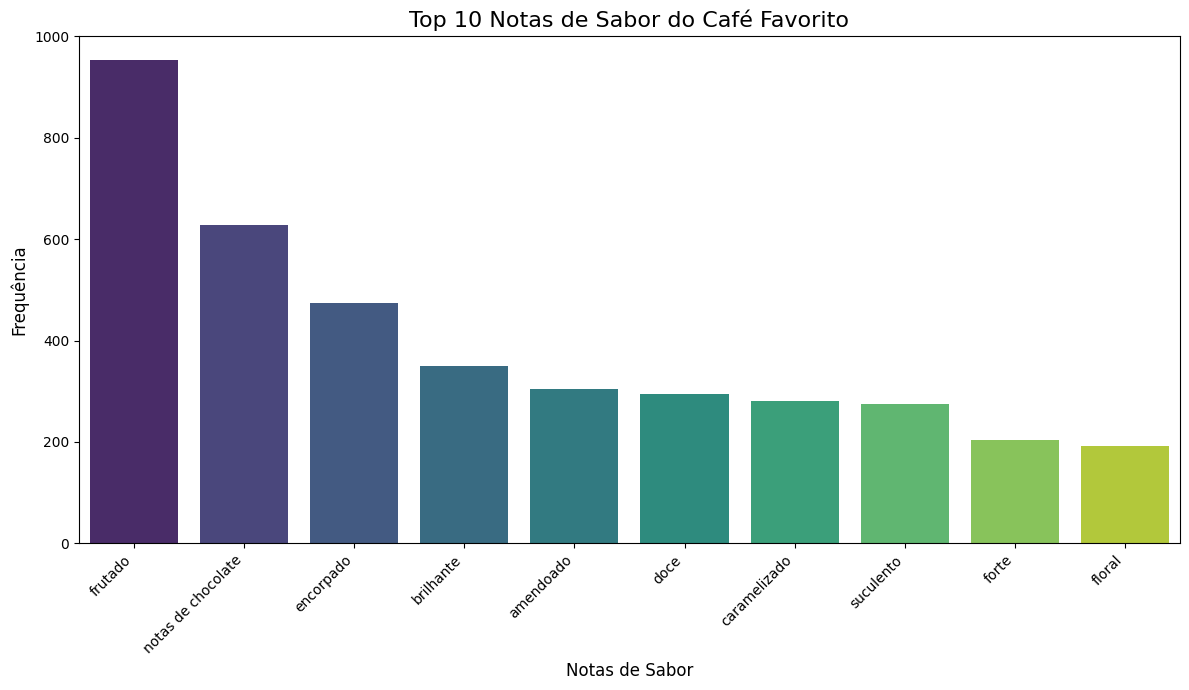

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_notas.index, y=top_10_notas.values, palette='viridis')
plt.title('Top 10 Notas de Sabor do Café Favorito', fontsize=16)
plt.xlabel('Notas de Sabor', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Razões de Beber Café

* Identificar as razões pelas quais os participantes bebem café, contando a frequência de cada motivo.




In [ ]:
motivos_colunas = ['motivo_sabor', 'motivo_cafeina', 'motivo_ritual', 'motivo_laxativo', 'motivo_outro']

motivos_contagem = {}

for coluna in motivos_colunas:
    contagem_true = df_gold[coluna].apply(lambda x: str(x).lower() == 'sim').sum()
    motivos_contagem[coluna] = contagem_true

motivos_contagem_series = pd.Series(motivos_contagem)

print("Frequência de cada motivo para beber café:")
print(motivos_contagem_series.sort_values(ascending=False))

Frequência de cada motivo para beber café:
motivo_sabor       3355
motivo_cafeina     2021
motivo_ritual      1922
motivo_laxativo     465
motivo_outro        168
dtype: int64


##grafico demonstrativo razoes de beber café

/tmp/ipython-input-3368894851.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=motivos_contagem_series.index, y=motivos_contagem_series.values, palette='viridis')


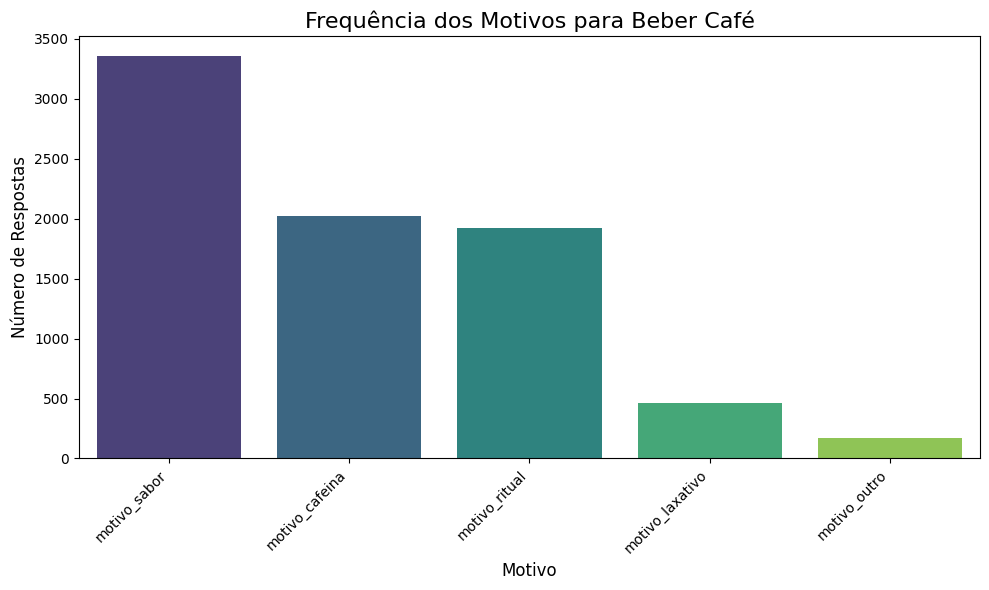

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_contagem_series.index, y=motivos_contagem_series.values, palette='viridis')
plt.title('Frequência dos Motivos para Beber Café', fontsize=16)
plt.xlabel('Motivo', fontsize=12)
plt.ylabel('Número de Respostas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_gold.head(25)

,idade,copos_por_dia,onde_bebe_cafe,bebe_em_casa,bebe_no_escritorio,bebe_em_movimento,bebe_em_cafeteria,bebe_nenhum_destes,preparo_em_casa,cafe_pour_over,...,motivo_outro_texto,gosta_sabor_cafe,sabe_origem_cafe,maior_valor_pago,maior_valor_disposto,satisfacao_cafe,gasto_equipamentos_5_anos,satisfacao_equipamentos,genero,genero_especificado
0,18 a 24 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
1,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina de cápsula (ex. nespresso),não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
2,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina bean to cup,não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
3,35 a 44 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,máquina de café (ex. mr.cofee),não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
4,25 a 34 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,coado,sim,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
5,55 a 64 anos,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,"máquina de cápsula (ex. nespresso), expresso, ...",não,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
6,18 a 24 anos,nao_informado,"em um café, no escritório, em casa, no caminho",sim,sim,sim,sim,não,"coado, prensa francesa, expresso, café instant...",sim,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
7,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
8,25 a 34 anos,menos de um,em um café,não,não,não,sim,não,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado
9,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,...,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado,nao_informado


In [ ]:
df_gold.shape

(4042, 98)

###Explicação estruturada para cada uma das análises


Bebida Favorita por Gênero: Hipótese escolhida: Existem diferenças significativas nas preferências de bebidas de café entre os gêneros (masculino, feminino, não-binário e outros). Dados que sustentam/refutam a hipótese:
Colunas de Análise: genero, bebida_favorita.
Evidências: drink_gender_percentage DataFrame (calculado como df_filtered_gender.groupby('genero')['bebida_favorita'].value_counts(normalize=True)*100).
Para feminino, Latte (31.77%) e Drip coffee (20.37%) são as mais populares.
Para masculino, Drip coffee (25.10%) e Expresso (20.17%) são as mais populares. Latte também é significativo (18.82%).
Para nao_binario, Drip coffee (25.77%) e Latte (23.71%) são as principais.
Para Outros, Coado (30.00%) e Latte (30.00%) são as mais votadas.
Gráfico: demonstra visualmente essas diferenças percentuais por gênero e bebida favorita. Conclusão: Sustentada. Os dados mostram que, embora algumas bebidas como Drip coffee e Latte sejam universalmente populares, existem variações notáveis nas preferências percentuais entre os diferentes gêneros, indicando tendências distintas. Por exemplo, Expresso é mais predominante entre o gênero masculino, enquanto Coado e Latte dominam para Outros.

Ambiente de Consumo de Café: Hipótese escolhida: Existe uma relação entre o local de consumo de café e a quantidade média de copos consumidos por dia. Dados que sustentam/refutam a hipótese:
Colunas de Análise: onde_bebe_cafe, copos_por_dia.
Evidências: df.groupby('onde_bebe_cafe')[numeric_copos_por_dia.name].apply(lambda x: numeric_copos_por_dia[x.index].mean()).sort_values(ascending=False) e contagem_onde_bebe_filtrado.
Locais como 'Em casa, Nenhuma das opções' e 'Em um café, No escritório, No caminho, Em casa' apresentam médias de consumo diário mais altas (3.0 e 2.75 copos, respectivamente).
O gráfico de barras Locais Mais Comuns de Consumo de Café (gerado a partir de contagem_onde_bebe_filtrado) mostra que 'Em casa' é o local mais frequente de consumo. Conclusão: Sustentada. Há uma indicação de que certos ambientes ou combinações de ambientes de consumo estão associados a uma maior média de copos de café por dia, sugerindo que a conveniência e o ambiente influenciam a frequência.

Café Favorito Geral e Notas de Sabor: Hipótese escolhida: O café mais votado ('Coffee D') possui um perfil de sabor específico que o torna favorito entre os participantes. Dados que sustentam/refutam a hipótese:
Colunas de Análise: favorito_geral, cafe_d_notas.
Evidências: contagem_cafe_favorito e top_10_notas.
O Coffee D foi o café favorito geral, com 1385 votos (contagem_cafe_favorito).
As Top 10 notas de sabor para o Coffee D são: 'fruity' (296), 'blueberry' (155), 'bright' (98), 'berries' (77), 'fermented' (66), 'sour' (65), 'cherry' (62), 'berry' (58), 'fruit' (58) e 'juicy' (56).
O gráfico Top 10 Notas de Sabor do Café Favorito visualiza a predominância dessas notas. Conclusão: Sustentada. O Coffee D é o favorito geral, e suas notas de sabor predominantes são 'frutadas' e 'ácidas' (fruity, blueberry, bright, berries, sour, cherry, berry, fruit, juicy), o que sugere que este perfil de sabor específico é altamente apreciado pelos participantes.

Razões para Beber Café: Hipótese escolhida: Os participantes bebem café por motivos variados, mas alguns motivos são mais predominantes que outros. Dados que sustentam/refutam a hipótese:
Colunas de Análise: motivo_sabor, motivo_cafeina, motivo_ritual, motivo_laxativo, motivo_outro.
Evidências: motivos_contagem_series.
Os motivos mais frequentes são: 'motivo_sabor' (3355), 'motivo_cafeina' (2021) e 'motivo_ritual' (1922).
Outros motivos como 'motivo_laxativo' (465) e 'motivo_outro' (168) são menos comuns.
Gráfico: O Frequência dos Motivos para Beber Café (gerado a partir de motivos_contagem_series) ilustra visualmente a proeminência de cada razão. Conclusão: Sustentada. A maioria dos participantes bebe café principalmente pelo 'gosto' (sabor), pela 'cafeína' e pelo 'ritual' associado, indicando que a experiência sensorial e os efeitos estimulantes e habituais são os fatores mais importantes.
